<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/magnetar.py/Condensed_Free_Ion-ModBBCap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the entire repository

In [1]:
# Get the entire archive (maybe you already have it)
# ! git clone https://github.com/UBC-Astrophysics/QEDSurface.git

In [2]:
# change the directory if you have to
# import os
# os.chdir('QEDSurface/magnetar.py')


In [3]:
# update just in case
#! git pull

# Load Libraries

In [4]:
import Magnetar
import numpy as np


import matplotlib.pyplot as plt

# Create the condensed surface map

## Put in the surface maps using the dipole pattern

In [5]:
mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_surface,0.6,1.25e14,70565.,fixed_ions=False)
#mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_,0.6,1.25e14,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)


/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:185: RuntimeWarning: invalid value encountered in sqrt
  n0m=sqrt(1.-epe**2/(ece*(ene-eci)))
/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:218: RuntimeWarning: invalid value encountered in sqrt
  nt=sqrt(1.-epet**2/(ece*(ene-eci)))
/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:185: RuntimeWarning: invalid value encountered in sqrt
  n0m=sqrt(1.-epe**2/(ece*(ene-eci)))
/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:218: RuntimeWarning: invalid value encountered in sqrt
  nt=sqrt(1.-epet**2/(ece*(ene-eci)))


## Add the polar cap and its edge

In [6]:
#mysurfmodel=Magnetar.dipole_model(Magnetar.condensed_surface,1,1e13,70565.,fixed_ions=False)
# The first two are the hot spot
cap1=Magnetar.modified_bb_atmo(1.05,1.25e14,0.0,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
cap2=Magnetar.modified_bb_atmo(1.05,1.25e14,2.6,freq_power=2,sigma_power=4/13,kb_suppress=True,limb_darkening=True)
cap3=Magnetar.condensed_surface(0.6,1.25e14,2.7,70565.,fixed_ions=False)
mysurfmodel.add_patch(cap1,0)
mysurfmodel.add_patch(cap2,5.2)
mysurfmodel.add_patch(cap3,5.4)
mysurfmodel.sort_patches()

/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:185: RuntimeWarning: invalid value encountered in sqrt
  n0m=sqrt(1.-epe**2/(ece*(ene-eci)))
/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:218: RuntimeWarning: invalid value encountered in sqrt
  nt=sqrt(1.-epet**2/(ece*(ene-eci)))


## Add the back of the star by copying from the front

In [7]:
aa=mysurfmodel.mcolat
# copy the front surface to the back of the star
# add the angles
mysurfmodel.mcolat=aa+[180-i for i in aa[::-1]]
# add the patches
mysurfmodel.patches=mysurfmodel.patches+mysurfmodel.patches[::-1]

In [8]:
print(aa)

[0, 5.2, 5.4, 12.324453902916263, 21.75296929214282, 28.666796044689516, 34.69757954231722, 40.35481007408245, 45.92370564698004, 51.645629980251826, 57.82408339995864, 65.02780337281952, 75.15377279636012]


# Work with a single orientation

## Load the propagation file (pfield)

In [9]:
pfield_test=Magnetar.pfield().loaddata('Sample_Pfields/pfield_models_QED/pfield_5keV_30deg')

## Calculate intensities across the image

In [10]:
pfield_test.recalculate(1.65426,mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

(14507.116163531156, -1351.6068858209144)

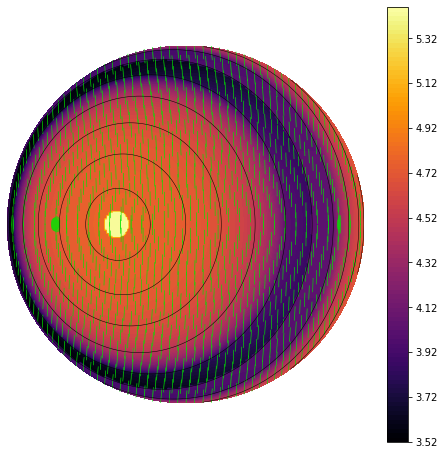

In [11]:
pfield_test

In [12]:
# calculate the mean intensity over the surface for a range of photon energies
pfield_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)



In [13]:
ivec=pfield_test.iint
qvec=pfield_test.qint

## Let's do some plots

In [14]:
# load a datafile
datae,dataf=np.loadtxt('4U_0142+614.dat',unpack=True,usecols=(0,1))

In [15]:
# get the mean intensities and energy bins for the orientation
ee=pfield_test.ebins
# load a file with the interstellar absorption model
eabs,sabs=np.loadtxt('tbabs.dat',unpack=True)
sabs=sabs
ii=np.argsort(eabs)
eabs=eabs[ii]
sabs=sabs[ii]
# absorption cross-section per hydrogen atom in units of 1e-24 cm^2 for our energy bins
ssabs=np.interp(ee,eabs,sabs)/(ee)**3*1e-24
# the best-fit hydrogen column is 0.52e22 /cm2
totabs=np.exp(-0.45e22*ssabs)

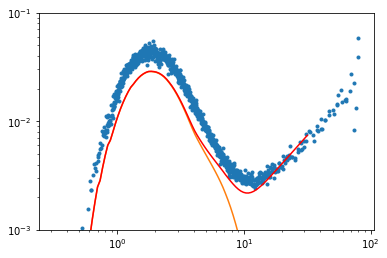

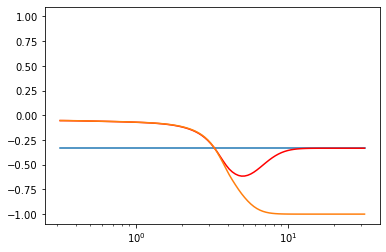

In [16]:
# plot the model against the data
norm=0.7e6
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ee*ivec/norm)
plt.loglog(ee,totabs*(ee*ivec/norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec/norm)/(ivec/norm+ee**1.3/1.2e4),'r')
plt.plot(ee,qvec/ivec)
#plt.plot([ee[0],ee[-1]],[-1.0,-1.0],'k')
plt.xscale("log")
plt.ylim(-1.1,1.1)
plt.show()

In [17]:
eenocap,iinocap=np.loadtxt("nocap.dat")
iicap=ivec-iinocap
iicap9=np.interp(ee,eenocap*0.8,iicap)

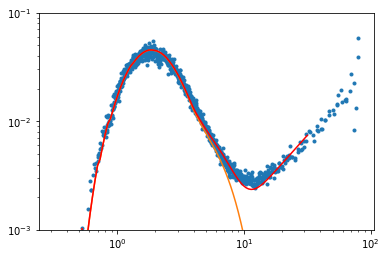

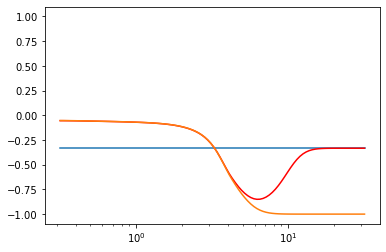

In [19]:
mm=np.interp(datae,ee,totabs*ee*ivec) 
norm=np.mean(dataf[(datae>1) & (datae<4)])/np.mean(mm[(datae>1) & (datae<4)])
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*ee*ivec*norm)
#plt.loglog(eenocap,totabs*ee*iinocap*norm)
#plt.loglog(ee,totabs*(ee*1.2*iicap9*norm),'r')
#plt.loglog(ee,totabs*(ee*iicap*norm),'r')

#plt.loglog(ee,totabs*(ee*(iinocap+1.5*iicap)*norm+ee**1.3/1.2e4),'r')
plt.loglog(ee,totabs*(ee*ivec*norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot(ee,(-ee**1.3/1.2e4/3+ee*qvec*norm)/(ee*ivec*norm+ee**1.3/1.2e4),'r')
plt.plot(ee,qvec/ivec)
#plt.plot([ee[0],ee[-1]],[-1.0,-1.0],'k')
plt.xscale("log")
plt.ylim(-1.1,1.1)
plt.show()

#### 

# Work with all orientations

## Load the orientation files

In [20]:
import glob
pfieldarray_test=Magnetar.pfield_array().loaddata(glob.glob('Sample_Pfields/pfield_models_QED/*'))

## Calculate the mean intensities for all orientations and energies

In [21]:
pfieldarray_test.calcvalues(mysurfmodel,gtt=(1-2*2.0/10.0)**0.5)

/home/idies/workspace/Storage/heyl/persistent/QEDSurface/magnetar.py/Magnetar/condensed.py:218: RuntimeWarning: invalid value encountered in sqrt
  nt=sqrt(1.-epet**2/(ece*(ene-eci)))


In [22]:
print(pfieldarray_test)


#
# class pfield
#
# filename      Sample_Pfields/pfield_models_QED/pfield_5keV_0.deg
#
#   Phi[rad]  Energy[keV]            I          Q/I
           0     0.316228      4826.87  8.33834e-10
           0     0.331285       5192.6  8.35922e-10
           0      0.34706      5575.39  8.41404e-10
           0     0.363585       5977.3  8.49207e-10
           0     0.380897      6398.96  8.58959e-10
           0     0.399034      6840.47  8.70535e-10
           0     0.418034      7301.59  8.83932e-10
           0      0.43794      7781.79  8.98391e-10
           0     0.458792      8280.19  9.10914e-10
           0     0.480638       8795.6  9.22943e-10
           0     0.503524      9326.45  9.36129e-10
           0       0.5275      9870.77   9.5055e-10
           0     0.552617      10426.2  9.66299e-10
           0      0.57893      10989.9  9.83493e-10
           0     0.606496      11558.5  1.00227e-09
           0     0.635375      12128.2  1.02152e-09
           0     0.665629  

## Plot the mean intensity over the orientations

In [23]:
ivec=[pf.iint  for pf in pfieldarray_test.pfi]
qvec=[pf.qint  for pf in pfieldarray_test.pfi]
ee=pfieldarray_test.pfi[0].ebins

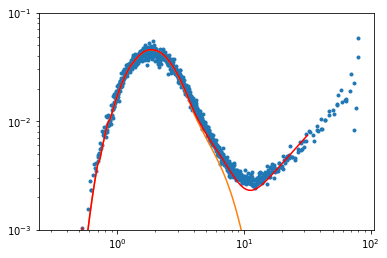

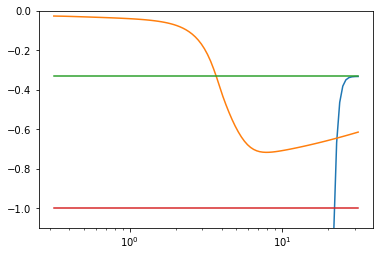

In [30]:

totivec = (ivec[0]+ivec[1]+ivec[2]+ivec[3]+ivec[4]+ivec[5]+ivec[6])/7
totqvec = (qvec[0]+qvec[1]+qvec[2]+qvec[3]+qvec[4]+qvec[5]+qvec[6])/7
mm=np.interp(datae,ee,totabs*ee*totivec) 
norm=np.mean(dataf[(datae>1) & (datae<4)])/np.mean(mm[(datae>1) & (datae<4)])

plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*totivec*ee*norm)
plt.loglog(ee,totabs*(totivec*ee*norm+ee**1.3/1.2e4),'r')
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+totqvec*ee**norm)/(ee*totivec*norm+ee**1.3/1.2e4))
plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0)
plt.show()

## Plot the intensity for several orientations

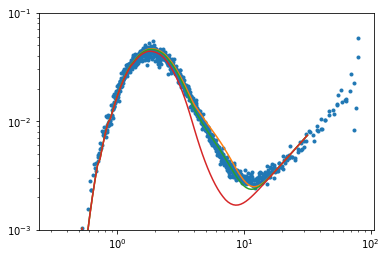

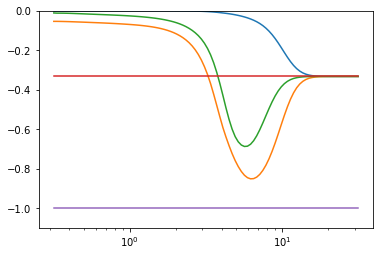

In [31]:
#norm=1.9e6
plt.loglog(datae,dataf,'.')
plt.loglog(ee,totabs*(ivec[0]*norm*ee+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[3]*norm*ee+ee**1.3/1.2e4))
plt.loglog(ee,totabs*(ivec[6]*norm*ee+ee**1.3/1.2e4))
plt.ylim(1e-3,1e-1)
plt.show()
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[0]*ee*norm)/(ivec[0]*ee*norm+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[3]*ee*norm)/(ivec[3]*ee*norm+ee**1.3/1.2e4))
plt.plot(ee,(-ee**1.3/1.2e4/3+qvec[6]*ee*norm)/(ivec[6]*ee*norm+ee**1.3/1.2e4))
#plt.plot(ee,totqvec/totivec)
plt.plot([ee[0],ee[-1]],[-0.33,-0.33])
plt.plot([ee[0],ee[-1]],[-1.0,-1.0])
plt.xscale("log")
plt.ylim(-1.1,0.0)
plt.show()

In [27]:
print(cap1)
print(cap2)

#
# class modified_bb_atmo
#
# effective_temperature         1.05 keV
# surface_temperature    2.08696e-05 keV [tau=1 for upgoing O-mode with E=surface_temperature, neglecting k dot b suppression]
# mag_strength              1.25e+14 Gauss
# mag_inclination                  0 degrees
# cyclotron energy            1451.7 keV
# k dot b supression            True 
# limb darkening                True 
# freq_power                       2 [cross-section goes as 1/freq**freqpower for O-mode]
# sigma_power               0.307692 [temperature goes as column-density**sigma_power]
#
# ./atm -o XXX_14.0969_7.08582_0 -B 14.0969 -T 7.08582 -b 0 -m 11 -p 5 -a 1.5 -M 2 -D 5 
#
#       
#   Energy[keV]          I          Q/I
   0.00504951      10.3114    -0.958859
   0.00536928      11.6572     -0.95886
    0.0057093      13.1785    -0.958861
   0.00607085      14.8983    -0.958861
   0.00645529      16.8423    -0.958862
   0.00686408      19.0397    -0.958862
   0.00729876      21.5236    -0.958862